# Project: Investigate a Dataset - [FBI Gun Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

### Dataset Description 

>The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms purchase. I consulted national tables covering types of weapons purchased,and total weapons purchased from **'NICS gun data'** and similar tables for the states and total populations from **'US Census data'**.


### Questions for Analysis
 >**1.** Which states have had the highest growth in gun registrations? 
 
 >**2.** What is the overall trend of gun purchases?
 
 >**3.** What are the correlation with the different types of guns and their return rates.
 
 >**4.** Which states are guns easily accessible?
 
 >**The best state to live!!**
 

# Data Wrangling

In [124]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [125]:
# load data
df_gun = pd.read_excel('gun_data.xlsx')
df_gun.head()

month       state   permit  permit_recheck  handgun  long_gun   other  \
0  2017-09     Alabama  16717.0             0.0   5734.0    6320.0   221.0   
1  2017-09      Alaska    209.0             2.0   2320.0    2930.0   219.0   
2  2017-09     Arizona   5069.0           382.0  11063.0    7946.0   920.0   
3  2017-09    Arkansas   2935.0           632.0   4347.0    6063.0   165.0   
4  2017-09  California  57839.0             0.0  37165.0   24581.0  2984.0   

   multiple  admin  prepawn_handgun  ...  returned_other  rentals_handgun  \
0       317    0.0             15.0  ...             0.0              0.0   
1       160    0.0              5.0  ...             0.0              0.0   
2       631    0.0             13.0  ...             0.0              0.0   
3       366   51.0             12.0  ...             0.0              0.0   
4         0    0.0              0.0  ...             0.0              0.0   

   rentals_long_gun  private_sale_handgun  private_sale_long_gun  \
0               0.0                   9.0                   16.0   
1               0.0                  17.0                   24.0   
2               0.0                  38.0                   12.0   
3               0.0                  13.0                   23.0   
4               0.0                   0.0                    0.0   

   private_sale_other  return_to_seller_handgun  return_to_seller_long_gun  \
0                 3.0                       0.0                        0.0   
1                 1.0                       0.0                        0.0   
2                 2.0                       0.0                        0.0   
3                 0.0                       0.0                        2.0   
4                 0.0                       0.0                        0.0   

   return_to_seller_other  totals  
0                     3.0   32019  
1                     0.0    6303  
2                     0.0   28394  
3                     1.0   17747  
4                     0.0  123506  

[5 rows x 27 columns]

In [126]:
df_gun.shape

(12485, 27)

In [127]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [128]:
#view data to view and drop null values  
df_gun.isnull().sum()

df_gun.dropna(how='any', axis=0, inplace=True)

df_gun.isnull().sum()

month                        0
state                        0
permit                       0
permit_recheck               0
handgun                      0
long_gun                     0
other                        0
multiple                     0
admin                        0
prepawn_handgun              0
prepawn_long_gun             0
prepawn_other                0
redemption_handgun           0
redemption_long_gun          0
redemption_other             0
returned_handgun             0
returned_long_gun            0
returned_other               0
rentals_handgun              0
rentals_long_gun             0
private_sale_handgun         0
private_sale_long_gun        0
private_sale_other           0
return_to_seller_handgun     0
return_to_seller_long_gun    0
return_to_seller_other       0
totals                       0
dtype: int64

In [129]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 770 entries, 0 to 769
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      770 non-null    object 
 1   state                      770 non-null    object 
 2   permit                     770 non-null    float64
 3   permit_recheck             770 non-null    float64
 4   handgun                    770 non-null    float64
 5   long_gun                   770 non-null    float64
 6   other                      770 non-null    float64
 7   multiple                   770 non-null    int64  
 8   admin                      770 non-null    float64
 9   prepawn_handgun            770 non-null    float64
 10  prepawn_long_gun           770 non-null    float64
 11  prepawn_other              770 non-null    float64
 12  redemption_handgun         770 non-null    float64
 13  redemption_long_gun        770 non-null    float64

In [130]:
df_gun.duplicated().sum()

0

In [131]:
df_gun.drop_duplicates(keep=False, inplace=True)

In [132]:
df_gun.nunique()

month                         14
state                         55
permit                       655
permit_recheck               140
handgun                      721
long_gun                     703
other                        503
multiple                     427
admin                         54
prepawn_handgun               38
prepawn_long_gun              33
prepawn_other                  7
redemption_handgun           427
redemption_long_gun          446
redemption_other              40
returned_handgun             172
returned_long_gun             85
returned_other                27
rentals_handgun                8
rentals_long_gun               8
private_sale_handgun          97
private_sale_long_gun         90
private_sale_other            38
return_to_seller_handgun      14
return_to_seller_long_gun     13
return_to_seller_other         5
totals                       763
dtype: int64

In [133]:
df_gun.head()

month       state   permit  permit_recheck  handgun  long_gun   other  \
0  2017-09     Alabama  16717.0             0.0   5734.0    6320.0   221.0   
1  2017-09      Alaska    209.0             2.0   2320.0    2930.0   219.0   
2  2017-09     Arizona   5069.0           382.0  11063.0    7946.0   920.0   
3  2017-09    Arkansas   2935.0           632.0   4347.0    6063.0   165.0   
4  2017-09  California  57839.0             0.0  37165.0   24581.0  2984.0   

   multiple  admin  prepawn_handgun  ...  returned_other  rentals_handgun  \
0       317    0.0             15.0  ...             0.0              0.0   
1       160    0.0              5.0  ...             0.0              0.0   
2       631    0.0             13.0  ...             0.0              0.0   
3       366   51.0             12.0  ...             0.0              0.0   
4         0    0.0              0.0  ...             0.0              0.0   

   rentals_long_gun  private_sale_handgun  private_sale_long_gun  \
0               0.0                   9.0                   16.0   
1               0.0                  17.0                   24.0   
2               0.0                  38.0                   12.0   
3               0.0                  13.0                   23.0   
4               0.0                   0.0                    0.0   

   private_sale_other  return_to_seller_handgun  return_to_seller_long_gun  \
0                 3.0                       0.0                        0.0   
1                 1.0                       0.0                        0.0   
2                 2.0                       0.0                        0.0   
3                 0.0                       0.0                        2.0   
4                 0.0                       0.0                        0.0   

   return_to_seller_other  totals  
0                     3.0   32019  
1                     0.0    6303  
2                     0.0   28394  
3                     1.0   17747  
4                     0.0  123506  

[5 rows x 27 columns]

In [134]:
df_gun.shape

(770, 27)

In [135]:
#I only need 55 rows,total number of state populations provided.
df_gun_new = df_gun.iloc[0:55]
df_gun_new.head()

month       state   permit  permit_recheck  handgun  long_gun   other  \
0  2017-09     Alabama  16717.0             0.0   5734.0    6320.0   221.0   
1  2017-09      Alaska    209.0             2.0   2320.0    2930.0   219.0   
2  2017-09     Arizona   5069.0           382.0  11063.0    7946.0   920.0   
3  2017-09    Arkansas   2935.0           632.0   4347.0    6063.0   165.0   
4  2017-09  California  57839.0             0.0  37165.0   24581.0  2984.0   

   multiple  admin  prepawn_handgun  ...  returned_other  rentals_handgun  \
0       317    0.0             15.0  ...             0.0              0.0   
1       160    0.0              5.0  ...             0.0              0.0   
2       631    0.0             13.0  ...             0.0              0.0   
3       366   51.0             12.0  ...             0.0              0.0   
4         0    0.0              0.0  ...             0.0              0.0   

   rentals_long_gun  private_sale_handgun  private_sale_long_gun  \
0               0.0                   9.0                   16.0   
1               0.0                  17.0                   24.0   
2               0.0                  38.0                   12.0   
3               0.0                  13.0                   23.0   
4               0.0                   0.0                    0.0   

   private_sale_other  return_to_seller_handgun  return_to_seller_long_gun  \
0                 3.0                       0.0                        0.0   
1                 1.0                       0.0                        0.0   
2                 2.0                       0.0                        0.0   
3                 0.0                       0.0                        2.0   
4                 0.0                       0.0                        0.0   

   return_to_seller_other  totals  
0                     3.0   32019  
1                     0.0    6303  
2                     0.0   28394  
3                     1.0   17747  
4                     0.0  123506  

[5 rows x 27 columns]

In [136]:
#load the census data
import pandas as pd

df_census = pd.read_csv('U.S. Census Data.csv', decimal=',',header=None)

df_census.head()

0          1          2   \
0                                               Fact  Fact Note    Alabama   
1       Population estimates, July 1, 2016,  (V2016)        NaN  4,863,300   
2  Population estimates base, April 1, 2010,  (V2...        NaN  4,780,131   
3  Population, percent change - April 1, 2010 (es...        NaN      1.70%   
4                  Population, Census, April 1, 2010        NaN  4,779,736   

        3          4          5           6          7            8   \
0   Alaska    Arizona   Arkansas  California   Colorado  Connecticut   
1  741,894  6,931,071  2,988,248  39,250,017  5,540,545    3,576,452   
2  710,249  6,392,301  2,916,025  37,254,522  5,029,324    3,574,114   
3    4.50%      8.40%      2.50%       5.40%     10.20%        0.10%   
4  710,231  6,392,017  2,915,918  37,253,956  5,029,196    3,574,097   

         9   ...            42         43          44         45       46  \
0  Delaware  ...  South Dakota  Tennessee       Texas       Utah  Vermont   
1   952,065  ...        865454    6651194  27,862,596  3,051,217  624,594   
2   897,936  ...        814195    6346298  25,146,100  2,763,888  625,741   
3     6.00%  ...         0.063      0.048      10.80%     10.40%   -0.20%   
4   897,934  ...        814180    6346105  25,145,561  2,763,885  625,741   

          47          48             49         50       51  
0   Virginia  Washington  West Virginia  Wisconsin  Wyoming  
1  8,411,808   7,288,000      1,831,102  5,778,708  585,501  
2  8,001,041   6,724,545      1,853,011  5,687,289  563,767  
3      5.10%       8.40%         -1.20%      1.60%    3.90%  
4  8,001,024   6,724,540      1,852,994  5,686,986  563,626  

[5 rows x 52 columns]

In [137]:
#transpose and use only the state and population entries
df = df_census.T
df.head()

0                                             1   \
0       Fact  Population estimates, July 1, 2016,  (V2016)   
1  Fact Note                                           NaN   
2    Alabama                                     4,863,300   
3     Alaska                                       741,894   
4    Arizona                                     6,931,071   

                                                  2   \
0  Population estimates base, April 1, 2010,  (V2...   
1                                                NaN   
2                                          4,780,131   
3                                            710,249   
4                                          6,392,301   

                                                  3   \
0  Population, percent change - April 1, 2010 (es...   
1                                                NaN   
2                                              1.70%   
3                                              4.50%   
4                                              8.40%   

                                  4   \
0  Population, Census, April 1, 2010   
1                                NaN   
2                          4,779,736   
3                            710,231   
4                          6,392,017   

                                                  5   \
0  Persons under 5 years, percent, July 1, 2016, ...   
1                                                NaN   
2                                              6.00%   
3                                              7.30%   
4                                              6.30%   

                                              6   \
0  Persons under 5 years, percent, April 1, 2010   
1                                            NaN   
2                                          6.40%   
3                                          7.60%   
4                                          7.10%   

                                                  7   \
0  Persons under 18 years, percent, July 1, 2016,...   
1                                                NaN   
2                                             22.60%   
3                                             25.20%   
4                                             23.50%   

                                               8   \
0  Persons under 18 years, percent, April 1, 2010   
1                                             NaN   
2                                          23.70%   
3                                          26.40%   
4                                          25.50%   

                                                  9   ...   76           77  \
0  Persons 65 years and over, percent,  July 1, 2...  ...  NaN  Value Flags   
1                                                NaN  ...  NaN          NaN   
2                                             16.10%  ...  NaN          NaN   
3                                             10.40%  ...  NaN          NaN   
4                                             16.90%  ...  NaN          NaN   

                                                  78  \
0                                                  -   
1  Either no or too few sample observations were ...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                                  79                   80  \
0                                                  D                    F   
1  Suppressed to avoid disclosure of confidential...  Fewer than 25 firms   
2                                                NaN                  NaN   
3                                                NaN                  NaN   
4                                                NaN                  NaN   

                                       81             82  \
0                                      FN            NaN   
1  Footnote on this i

In [138]:
#slice the first two columns
df_1 = df.iloc[:,:2]
df_1.head()

0                                             1
0       Fact  Population estimates, July 1, 2016,  (V2016)
1  Fact Note                                           NaN
2    Alabama                                     4,863,300
3     Alaska                                       741,894
4    Arizona                                     6,931,071

In [139]:
#slice first two rows
df_2 = df_1.iloc[2:]
df_2.head(3)

0          1
2  Alabama  4,863,300
3   Alaska    741,894
4  Arizona  6,931,071

In [140]:
#rename the columns and view data
dfcensus = df_2.rename(columns={0:'state_1',1:'population'})
dfcensus.head()

dfcensus.population

2      4,863,300
3        741,894
4      6,931,071
5      2,988,248
6     39,250,017
7      5,540,545
8      3,576,452
9        952,065
10    20,612,439
11    10,310,371
12     1,428,557
13     1,683,140
14    12,801,539
15     6,633,053
16     3,134,693
17     2,907,289
18     4,436,974
19     4,681,666
20     1,331,479
21     6,016,447
22     6,811,779
23     9,928,300
24     5,519,952
25     2,988,726
26     6,093,000
27     1,042,520
28     1,907,116
29     2,940,058
30     1,334,795
31     8,944,469
32       2081015
33      19745289
34      10146788
35        757952
36      11614373
37       3923561
38       4093465
39      12784227
40       1056426
41       4961119
42        865454
43       6651194
44    27,862,596
45     3,051,217
46       624,594
47     8,411,808
48     7,288,000
49     1,831,102
50     5,778,708
51       585,501
Name: population, dtype: object

In [141]:
#convert the population values to float
dfcensus.population = dfcensus.population.replace(',','', regex=True).astype(float)
dfcensus.population

2      4863300.0
3       741894.0
4      6931071.0
5      2988248.0
6     39250017.0
7      5540545.0
8      3576452.0
9       952065.0
10    20612439.0
11    10310371.0
12     1428557.0
13     1683140.0
14    12801539.0
15     6633053.0
16     3134693.0
17     2907289.0
18     4436974.0
19     4681666.0
20     1331479.0
21     6016447.0
22     6811779.0
23     9928300.0
24     5519952.0
25     2988726.0
26     6093000.0
27     1042520.0
28     1907116.0
29     2940058.0
30     1334795.0
31     8944469.0
32     2081015.0
33    19745289.0
34    10146788.0
35      757952.0
36    11614373.0
37     3923561.0
38     4093465.0
39    12784227.0
40     1056426.0
41     4961119.0
42      865454.0
43     6651194.0
44    27862596.0
45     3051217.0
46      624594.0
47     8411808.0
48     7288000.0
49     1831102.0
50     5778708.0
51      585501.0
Name: population, dtype: float64

In [142]:
#merge the two datasets
gun_census=pd.concat([df_gun_new,dfcensus], axis=1)

gun_census.drop('state_1',axis=1,inplace=True)

gun_census.head(4)

month     state   permit  permit_recheck  handgun  long_gun  other  \
0  2017-09   Alabama  16717.0             0.0   5734.0    6320.0  221.0   
1  2017-09    Alaska    209.0             2.0   2320.0    2930.0  219.0   
2  2017-09   Arizona   5069.0           382.0  11063.0    7946.0  920.0   
3  2017-09  Arkansas   2935.0           632.0   4347.0    6063.0  165.0   

   multiple  admin  prepawn_handgun  ...  rentals_handgun  rentals_long_gun  \
0       317    0.0             15.0  ...              0.0               0.0   
1       160    0.0              5.0  ...              0.0               0.0   
2       631    0.0             13.0  ...              0.0               0.0   
3       366   51.0             12.0  ...              0.0               0.0   

   private_sale_handgun  private_sale_long_gun  private_sale_other  \
0                   9.0                   16.0                 3.0   
1                  17.0                   24.0                 1.0   
2                  38.0                   12.0                 2.0   
3                  13.0                   23.0                 0.0   

   return_to_seller_handgun  return_to_seller_long_gun  \
0                       0.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        0.0   
3                       0.0                        2.0   

   return_to_seller_other  totals  population  
0                     3.0   32019         NaN  
1                     0.0    6303         NaN  
2                     0.0   28394   4863300.0  
3                     1.0   17747    741894.0  

[4 rows x 28 columns]

In [143]:
#replace the NaN values with mean population
pop_mean = np.nanmean(gun_census.population, axis=0)


gun_census['population'].fillna(value=pop_mean, inplace=True)

gun_census

month                 state    permit  permit_recheck  handgun  \
0   2017-09               Alabama   16717.0             0.0   5734.0   
1   2017-09                Alaska     209.0             2.0   2320.0   
2   2017-09               Arizona    5069.0           382.0  11063.0   
3   2017-09              Arkansas    2935.0           632.0   4347.0   
4   2017-09            California   57839.0             0.0  37165.0   
5   2017-09              Colorado    4356.0             0.0  15751.0   
6   2017-09           Connecticut    4343.0           673.0   4834.0   
7   2017-09              Delaware     275.0             0.0   1414.0   
8   2017-09  District of Columbia       1.0             0.0     56.0   
9   2017-09               Florida   10784.0             0.0  39199.0   
10  2017-09               Georgia   12074.0             0.0  10933.0   
11  2017-09                  Guam       0.0             0.0     74.0   
12  2017-09                Hawaii     946.0             0.0      0.0   
13  2017-09                 Idaho    5162.0             0.0   3058.0   
14  2017-09              Illinois   15712.0         71432.0  18290.0   
15  2017-09               Indiana   18241.0             0.0  16093.0   
16  2017-09                  Iowa    5847.0          1217.0    151.0   
17  2017-09                Kansas    1567.0             3.0   4518.0   
18  2017-09              Kentucky  378384.0             0.0   8112.0   
19  2017-09             Louisiana    1827.0             0.0  10495.0   
20  2017-09                 Maine     783.0             0.0   3026.0   
21  2017-09       Mariana Islands       0.0             0.0     12.0   
22  2017-09              Maryland    2424.0             0.0   3389.0   
23  2017-09         Massachusetts    7160.0             0.0   4749.0   
24  2017-09              Michigan   16571.0            19.0   8654.0   
25  2017-09             Minnesota   25645.0             0.0   4862.0   
26  2017-09           Mississippi    1362.0             0.0   6260.0   
27  2017-09              Missouri     791.0             0.0  16993.0   
28  2017-09               Montana    1076.0             0.0   2395.0   
29  2017-09              Nebraska    3036.0           113.0    110.0   
30  2017-09                Nevada    1952.0             0.0   3992.0   
31  2017-09         New Hampshire    2795.0             0.0   4410.0   
32  2017-09            New Jersey       0.0             0.0   3985.0   
33  2017-09            New Mexico     847.0             0.0   5309.0   
34  2017-09              New York    2933.0          1164.0   8392.0   
35  2017-09        North Carolina   19292.0             0.0   1235.0   
36  2017-09          North Dakota     486.0             0.0   1359.0   
37  2017-09                  Ohio    8741.0           490.0  21085.0   
38  2017-09              Oklahoma       0.0             0.0   8869.0   
39  2017-09                Oregon    3774.0            11.0  11557.0   
40  2017-09          Pennsylvania   23144.0             0.0  39825.0   
41  2017-09           Puerto Rico       0.0             0.0    619.0   
42  2017-09          Rhode Island       0.0             0.0    907.0   
43  2017-09        South Carolina    9380.0           349.0   7574.0   
44  2017-09          South Dakota     562.0             0.0   2020.0   
45  2017-09             Tennessee   16887.0             0.0  19219.0   
46  2017-09                 Texas   31390.0             0.0  39119.0   
47  2017-09                  Utah   12094.0            25.0   2840.0   
48  2017-09               Vermont       0.0             0.0   1276.0   
49  2017-09        Virgin Islands       1.0             0.0      6.0   
50  2017-09              Virginia     585.0             0.0  19676.0   
51  2017-09            Washington   11451.0            44.0  13292.0   
52  2017-09         West Virginia    1668.0             0.0   5204.0   
53  2017-09             Wisconsin   12224.0             0.0  10918.0   
54  2017-09               Wyoming     280.0   

In [144]:
#Iterative function for columns
for i, v in enumerate(gun_census.columns):
    print(i, v)

0 month
1 state
2 permit
3 permit_recheck
4 handgun
5 long_gun
6 other
7 multiple
8 admin
9 prepawn_handgun
10 prepawn_long_gun
11 prepawn_other
12 redemption_handgun
13 redemption_long_gun
14 redemption_other
15 returned_handgun
16 returned_long_gun
17 returned_other
18 rentals_handgun
19 rentals_long_gun
20 private_sale_handgun
21 private_sale_long_gun
22 private_sale_other
23 return_to_seller_handgun
24 return_to_seller_long_gun
25 return_to_seller_other
26 totals
27 population


## Cleaning process
My data 'NICS gun data' had lots of missing values which I dropped using **drop.na()** function

Visually assessing 'US Census data',had only 55 rows,using **loc()** functions,was able to select only first 55 rows from NICS gun data
Had no duplicated data.

From 'US Census data',headers were the states names.setting **header=None**,was able to get the headers(states) as first row.

Transposed and slices only the states and corresponding population variables. 

Change population column from string to float and filled the null values with population means using the **fill.na()**

All insignificantt columns dropped using the **drop()** function

Finally concatenated the two dataframes to one Dataframe for analysis.


# Exploratory Data Analysis

In [145]:
gun_census.describe()

permit  permit_recheck       handgun      long_gun        other  \
count      55.000000       55.000000     55.000000     55.000000    55.000000   
mean    13847.672727     1392.127273   8692.400000   7587.363636   489.527273   
std     51107.254753     9622.650482  10264.393317   7063.632423   662.672755   
min         0.000000        0.000000      0.000000      0.000000     0.000000   
25%       573.500000        0.000000   1717.000000   2724.000000    80.000000   
50%      2933.000000        0.000000   4834.000000   6035.000000   219.000000   
75%     11762.500000        7.000000  10998.000000  11560.500000   646.000000   
max    378384.000000    71432.000000  39825.000000  39416.000000  2984.000000   

          multiple       admin  prepawn_handgun  prepawn_long_gun  \
count    55.000000   55.000000        55.000000         55.000000   
mean    320.690909    6.127273         5.818182          5.218182   
std     460.249565   26.865960        10.420939          8.056952   
min       0.000000    0.000000         0.000000          0.000000   
25%       3.500000    0.000000         0.000000          0.000000   
50%     163.000000    0.000000         0.000000          2.000000   
75%     396.000000    0.500000        10.000000          6.500000   
max    2473.000000  179.000000        59.000000         44.000000   

       prepawn_other  ...  rentals_handgun  rentals_long_gun  \
count      55.000000  ...        55.000000         55.000000   
mean        0.436364  ...         0.272727          0.181818   
std         0.918203  ...         1.660595          0.944593   
min         0.000000  ...         0.000000          0.000000   
25%         0.000000  ...         0.000000          0.000000   
50%         0.000000  ...         0.000000          0.000000   
75%         0.500000  ...         0.000000          0.000000   
max         4.000000  ...        12.000000          5.000000   

       private_sale_handgun  private_sale_long_gun  private_sale_other  \
count             55.000000              55.000000           55.000000   
mean              34.127273              31.636364            2.509091   
std              104.800349              89.382525            6.787441   
min                0.000000               0.000000            0.000000   
25%                0.000000               0.000000            0.000000   
50%                9.000000              10.000000            0.000000   
75%               17.000000              23.500000            2.000000   
max              701.000000             590.000000           42.000000   

       return_to_seller_handgun  return_to_seller_long_gun  \
count                 55.000000                  55.000000   
mean                   0.690909                   1.000000   
std                    1.438527                   2.134375   
min                    0.000000                   0.000000   
25%                    0.000000                   0.000000   
50%                    0.000000                   0.000000   
75%                    1.000000                   1.000000   
max                    7.000000                  13.000000   

       return_to_seller_other         totals    population  
count               55.000000      55.000000  5.500000e+01  
mean                 0.145455   33767.745455  6.448927e+06  
std                  0.487556   58176.375559  6.926937e+06  
min                  0.000000       9.000000  5.855010e+05  
25%                  0.000000    7311.000000  1.994066e+06  
50%                  0.000000   17491.000000  4.961119e+06  
75%                  0.000000   37134.500000  6.871425e+06  
max                  3.000000  398706.000000  3.925002e+07  

[8 rows x 26 columns]

>**1. The total guns held in the states is as almost correlated to the total population of the states.** 

>Let us do some plotting:

In [146]:
import pandas as pd
import matplotlib.pyplot as plt

#Function to generate a scatter plot of two columns in the gun_census dataset.


def scatter_plots(data, x_col, y_col):
    #This function takes in a pandas DataFrame, a column name for the x-axis, and a column name for the y-axis.It returns scatter plots for each unique value in the x-axis column.
    unique_values = data[x_col].unique()
    for value in unique_values:
        value_data = data[data[x_col] == value]
        plt.scatter(value_data[x_col], value_data[y_col])
        
        

    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title('Plot of ' + x_col + 'VS' + y_col)
    plt.show()



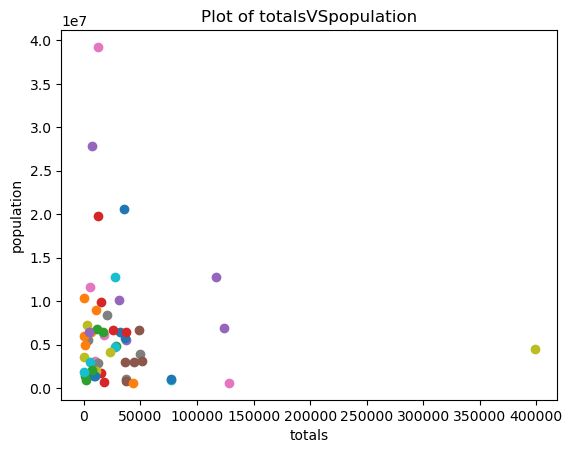

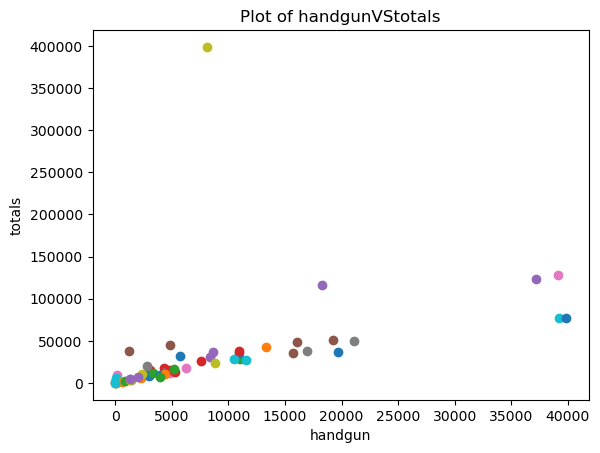

In [147]:
#The output can be iterated over different columns in the investigation of their correlations
# correlation between total guns held and population
scatter_plots(gun_census, "totals", "population")
scatter_plots(gun_census, "handgun", "totals")

Handguns have a higher a stronger correlation with the totals guns held as shown in the plot above.

>**A plot of different variables agains index states would be;**

In [148]:
import matplotlib.pyplot as plt

def plot_column(gun_census, col_name):
    fig, ax = plt.subplots()
    gun_census[col_name].plot(ax=ax)
    ax.set_xlabel('State_index')
    ax.set_ylabel(col_name)
    ax.set_title('Plot of ' + col_name)
    plt.show()


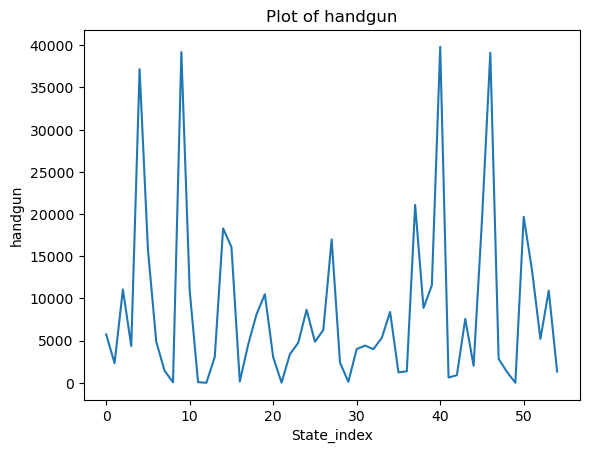

In [149]:
plot_column(gun_census, 'handgun')


/var/folders/lr/9d7qbckd3wz2lxschmvzbzcw0000gn/T/ipykernel_1178/2834794858.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  gun_census[columns].hist(bins=20,ax=ax);


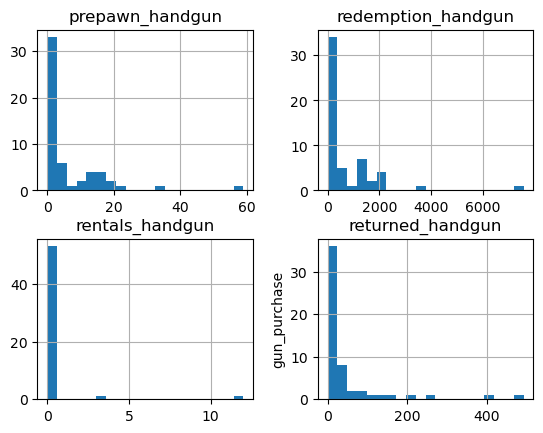

In [150]:
columns = ['prepawn_handgun', 'redemption_handgun', 'rentals_handgun', 'returned_handgun']
fig, ax = plt.subplots()
gun_census[columns].hist(bins=20,ax=ax);
plt.ylabel('gun_purchase');
plt.show()

>**2. Handguns have a much higer return to seller rates than the rest,this is also attributatable to its hiigher purchase rate that the rest.**

/var/folders/lr/9d7qbckd3wz2lxschmvzbzcw0000gn/T/ipykernel_1178/3860052768.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  gun_census[columns].hist(bins=20,ax=ax)


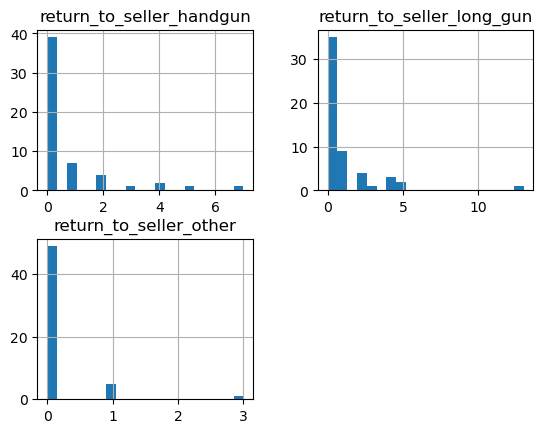

In [151]:
columns = ['return_to_seller_handgun', 'return_to_seller_long_gun', 'return_to_seller_other']
fig, ax = plt.subplots()
gun_census[columns].hist(bins=20,ax=ax)
plt.title('columns')
plt.ylabel('guns_returned')
plt.show()

>**3. Histograms of the different types of guns are typical right skewed indicating a positive trend with wich citizens in the different states are purchasing guns. Long_guns is quite left skewed. Alot of people prefers shot guns and others than long guns**

>**4. Which states are guns easily accessible?.**

In [152]:
state_max_min = gun_census.groupby('state')['totals'].max().sort_values()
state_max_min

state
Virgin Islands               9
Mariana Islands             16
District of Columbia        61
Guam                       135
Puerto Rico                791
Hawaii                     948
Rhode Island              1799
Vermont                   3084
Delaware                  3502
Wyoming                   4281
North Dakota              5212
Nebraska                  5345
Alaska                    6303
New Jersey                7165
South Dakota              7457
Maine                     8715
Nevada                    9460
Iowa                      9975
Montana                  10283
New Hampshire            10689
Maryland                 11255
Connecticut              12117
New Mexico               12491
Kansas                   12856
Idaho                    14938
Massachusetts            15460
West Virginia            16723
Mississippi              17491
Arkansas                 17747
Utah                     20041
Oklahoma                 23371
South Carolina           25930
Or

In [153]:
(gun_census[gun_census.totals == gun_census.totals.max()])

month     state    permit  permit_recheck  handgun  long_gun  other  \
18  2017-09  Kentucky  378384.0             0.0   8112.0    7543.0  253.0   

    multiple  admin  prepawn_handgun  ...  rentals_handgun  rentals_long_gun  \
18       543    1.0             16.0  ...              0.0               0.0   

    private_sale_handgun  private_sale_long_gun  private_sale_other  \
18                  21.0                   19.0                 1.0   

    return_to_seller_handgun  return_to_seller_long_gun  \
18                       2.0                        1.0   

    return_to_seller_other  totals  population  
18                     0.0  398706   4436974.0  

[1 rows x 28 columns]

In [154]:
(gun_census[gun_census.totals == gun_census.totals.min()])

month           state  permit  permit_recheck  handgun  long_gun  other  \
49  2017-09  Virgin Islands     1.0             0.0      6.0       2.0    0.0   

    multiple  admin  prepawn_handgun  ...  rentals_handgun  rentals_long_gun  \
49         0    0.0              0.0  ...              0.0               0.0   

    private_sale_handgun  private_sale_long_gun  private_sale_other  \
49                   0.0                    0.0                 0.0   

    return_to_seller_handgun  return_to_seller_long_gun  \
49                       0.0                        0.0   

    return_to_seller_other  totals  population  
49                     0.0       9   1831102.0  

[1 rows x 28 columns]

# Conclusions

>**High population rates of gun purchases equates to higher rates of guns returned back to the sellers as evident in the purchase of handguns and their return. States with higher gun purchase is Kentucky with 398706 total guns and Virginia Island with least number of guns.**

>**The best place place to live would be Virginia Island with less guns purchases and hence would assume less gun related crimes.**



#### Limitations

>**The result has limitation; the data present had missing values especially on the total populations of the states which were thereby filled with the mean but this could not alter the finding of this project though**  

>**end.**